In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import glob
from astropy.nddata import Cutout2D
import tqdm

In [2]:
list_of_files = glob.glob('CAN_Residual_Classification_images/*.fits')

In [3]:
list_of_files

['CAN_Residual_Classification_images\\cos_H.gf10013.fits',
 'CAN_Residual_Classification_images\\cos_H.gf10015.fits',
 'CAN_Residual_Classification_images\\cos_H.gf10033.fits',
 'CAN_Residual_Classification_images\\cos_H.gf10041.fits',
 'CAN_Residual_Classification_images\\cos_H.gf10069.fits',
 'CAN_Residual_Classification_images\\cos_H.gf10079.fits',
 'CAN_Residual_Classification_images\\cos_H.gf10081.fits',
 'CAN_Residual_Classification_images\\cos_H.gf10082.fits',
 'CAN_Residual_Classification_images\\cos_H.gf10104.fits',
 'CAN_Residual_Classification_images\\cos_H.gf10113.fits',
 'CAN_Residual_Classification_images\\cos_H.gf10117.fits',
 'CAN_Residual_Classification_images\\cos_H.gf10118.fits',
 'CAN_Residual_Classification_images\\cos_H.gf1013.fits',
 'CAN_Residual_Classification_images\\cos_H.gf10145.fits',
 'CAN_Residual_Classification_images\\cos_H.gf10168.fits',
 'CAN_Residual_Classification_images\\cos_H.gf10188.fits',
 'CAN_Residual_Classification_images\\cos_H.gf10189.fits'

In [4]:
def yield_fits_data(fits_file_name):
    fits_file = fits.open(fits_file_name, memmap=True)

    original_image = fits_file[1].data
    model_image = fits_file[2].data
    residual_image = fits_file[3].data
    
    fits_file.close()
    return original_image, model_image, residual_image


def make_cutout(input_data, cutout_size=(64,64)):
    yshape, xshape = input_data.shape
    ycen, xcen = yshape/2.0, xshape/2.0
    cutout_fits_file = Cutout2D(input_data, (xcen, ycen), size=cutout_size, mode='partial', fill_value=0)
    return cutout_fits_file.data

In [22]:
example_file = list_of_files[150]

In [23]:
o, m, r = yield_fits_data(example_file)

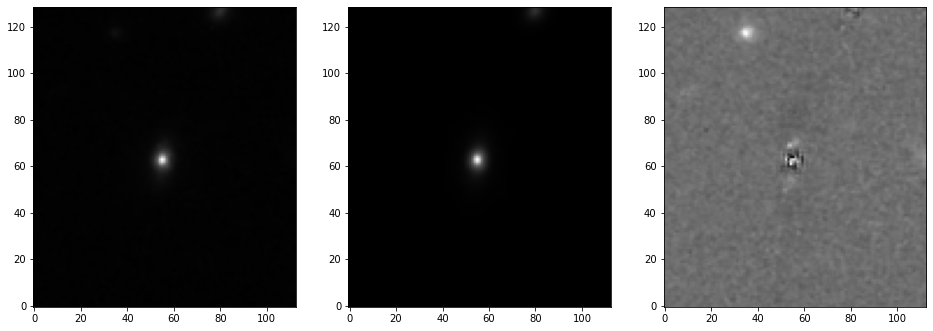

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[16,12])

axs[0].imshow(o, cmap='gray', origin='lower')
axs[1].imshow(m, cmap='gray', origin='lower')
axs[2].imshow(r, cmap='gray', origin='lower')

# axs[0].plot(xcen, ycen, color='red', marker='o', markersize=16)

plt.show()


In [25]:
co = make_cutout(r)

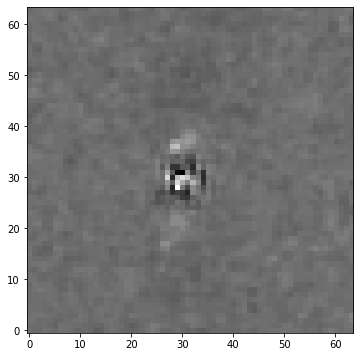

In [26]:
plt.figure(figsize=(8,6))
plt.imshow(co, cmap='gray', origin='lower')
plt.show()

In [10]:
processed_cutout_res_data = []

In [17]:
#From Residual

for each_file in tqdm.tqdm(list_of_files):
    o, m, r = yield_fits_data(each_file)
    co = make_cutout(r)
    processed_cutout_res_data.append(co)

100%|████████████████████████████████████████████████████████████████████████████| 10046/10046 [01:53<00:00, 88.59it/s]


In [18]:
np.array(processed_cutout_res_data).shape

(10046, 64, 64)

In [19]:
np.save("processes_res_data.npy",processed_cutout_res_data)

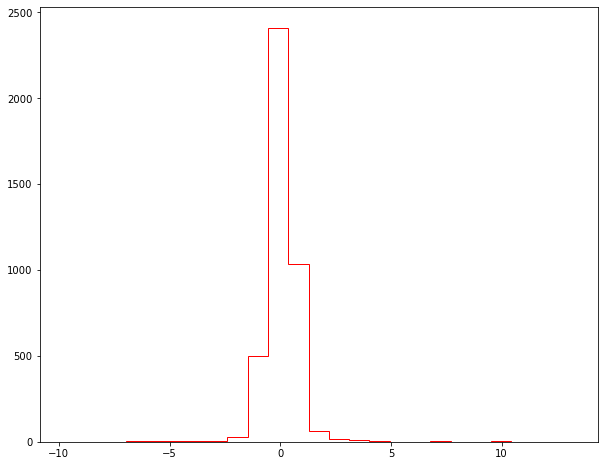

In [27]:
plt.figure(figsize=[10,8])
plt.hist((co/np.percentile(co, 95)).flat, bins=25, histtype='step',color='red')
plt.show()

In [28]:
np.percentile(co, 95)

0.009014473995193839

In [29]:
processed_cutout_o_data = []

In [30]:
#From Original

for each_file in tqdm.tqdm(list_of_files):
    o, m, r = yield_fits_data(each_file)
    co = make_cutout(o)
    processed_cutout_o_data.append(co)

100%|███████████████████████████████████████████████████████████████████████████| 10046/10046 [00:43<00:00, 231.25it/s]


In [33]:
np.array(processed_cutout_o_data).shape

(10046, 64, 64)

In [31]:
np.save("processes_o_data.npy",processed_cutout_o_data)

In [ ]:
# np.save(...)